In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from topolib import gda_lib
from topolib import IceSat2Data
import getpass
from topolib import gda_lib
import glob
import matplotlib.pyplot as plt
import rasterio 

In [2]:
%matplotlib inline

In [6]:
# # Earthdata Login credentials
# # Enter your Earthdata Login user name
# user_id = 'Shashank_17'
# # Enter your email address associated with your Earthdata Login account
# email = 'sbaglapl@uw.edu'
# password = getpass.getpass('Earthdata Login password: ')

In [7]:
# # Specify the variables of interest
# variables = {
#     'beams': [
#         '/land_ice_segments/atl06_quality_summary',
#         '/land_ice_segments/delta_time',
#         '/land_ice_segments/h_li',
#         '/land_ice_segments/h_li_sigma',
#         '/land_ice_segments/latitude',
#         '/land_ice_segments/longitude',
#         '/land_ice_segments/segment_id',
#         '/land_ice_segments/sigma_geo_h',
#         '/ancillary_data/atlas_sdp_gps_epoch'
#     ],
#     'other': [
#         '/orbit_info/cycle_number',
#         '/orbit_info/rgt',
#         '/orbit_info/orbit_number',
#     ]
# }
# # Area of interest
# boundaries = {
#     'LowerLeft_Lon': '86.43596713164361',
#     'LowerLeft_Lat': '26.965957751300405',
#     'UpperRight_Lon': '88.22911222366918',
#     'UpperRight_Lat': '29.03672631623175',
# }
# # Custom time range of interest
# time_range = {
#         'start_date': '2018-10-01',
#         'end_date': '2019-03-01'
# }

In [8]:
# # Setup a search session
# search = IceSat2Data(user_id, password, variables=variables)

In [8]:
# # Show available variables
# search.show_variables()

# # Show available formats
# search.show_formats()

In [9]:
# # Submit a download order to NSIDC with no time restriction
# search.order_data(
#     email,
#     '/home/jovyan/data/nepal_icesat/',
#     boundaries,
# )

# # # Submit a download order to NSIDC with no time restriction
# # search.order_data(
# #     email,
# #     '/home/jovyan/data/',
# #     boundaries,
# #     time_range=time_range    
# # )

In [3]:
hdf_fn_list = sorted(glob.glob('/home/jovyan/data/nepal_icesat/*/*.h5'))

In [4]:
dataset_dict = {'land_ice_segments':['h_li', 'delta_time','longitude','latitude','atl06_quality_summary'], 'land_ice_segments/ground_track':['x_atc']}

In [6]:
#add overview utility of rasterio

In [34]:
nepal_dem_fn = '/home/jovyan/data/wv_nepal_dem.vrt'
nepal_ds = rasterio.open(nepal_dem_fn)
nepal_dem = nepal_ds.read(1)
#oview = oviews[-1]
#nepal_dem_overview = nepal_ds.overviews(1)[0]
nepal_dem = np.ma.masked_equal(nepal_dem,gda_lib.get_ndv(nepal_ds))

In [31]:
nepal_dem

masked_array(data=32,
             mask=False,
       fill_value=-9999)

In [6]:
gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in hdf_fn_list]

In [7]:
big_gdf = gda_lib.concat_gdf(gdf_list)

In [8]:
xmin,ymin,xmax,ymax = nepal_ds.bounds
big_gdf = big_gdf.to_crs(nepal_ds.crs)
big_gdf = big_gdf.cx[xmin:xmax,ymin:ymax]

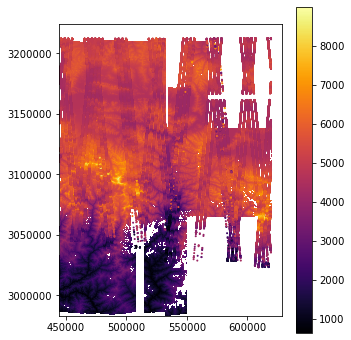

In [14]:
fig,ax = plt.subplots(figsize=(5,6))
im = ax.imshow(nepal_dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)


In [9]:
big_gdf.head()

,h_li,delta_time,longitude,latitude,atl06_quality_summary,pair,beam,p_b,geometry
0,NaN,2.543520e+07,86.842540,27.484628,1,1.0,0.0,1.0_0.0,POINT (86.84254016411816 27.48462779095918)
1,NaN,2.543520e+07,86.842521,27.484808,1,1.0,0.0,1.0_0.0,POINT (86.84252121338888 27.48480797416822)
2,NaN,2.543520e+07,86.842501,27.484988,1,1.0,0.0,1.0_0.0,POINT (86.84250126713103 27.48498807120726)
3,1926.680786,2.543520e+07,86.842481,27.485168,1,1.0,0.0,1.0_0.0,POINT (86.84248138657441 27.48516817318197)
4,NaN,2.543520e+07,86.842462,27.485348,1,1.0,0.0,1.0_0.0,POINT (86.84246218903448 27.4853483352613)


In [9]:
good_idx = big_gdf['atl06_quality_summary']==0
big_gdf = big_gdf.loc[good_idx]

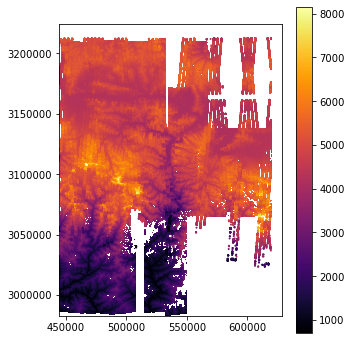

In [13]:
fig,ax = plt.subplots(figsize=(5,6))
im = ax.imshow(nepal_dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)


In [ ]:
#filter out based on only good e

In [13]:
# big_gdf_mtr = big_gdf.to_crs({'init':'epsg:3857'})

In [10]:
#looks cool
rgi_fn = '/home/jovyan/data/15_rgi60_SouthAsiaEast.shp'
rgi_gdf = gpd.read_file(rgi_fn)
rgi_gdf = rgi_gdf.to_crs(nepal_ds.crs)  

In [11]:
rgi_gdf = rgi_gdf.cx[xmin:xmax,ymin:ymax]

In [18]:
nepal_dem_overview = nepal_ds.overviews(1)
#nepal_dem = np.ma.masked_equal(nepal_dem_overview,gda_lib.get_ndv(nepal_ds))

In [19]:
nepal_dem_overview

[]

In [35]:
nepal_dem

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

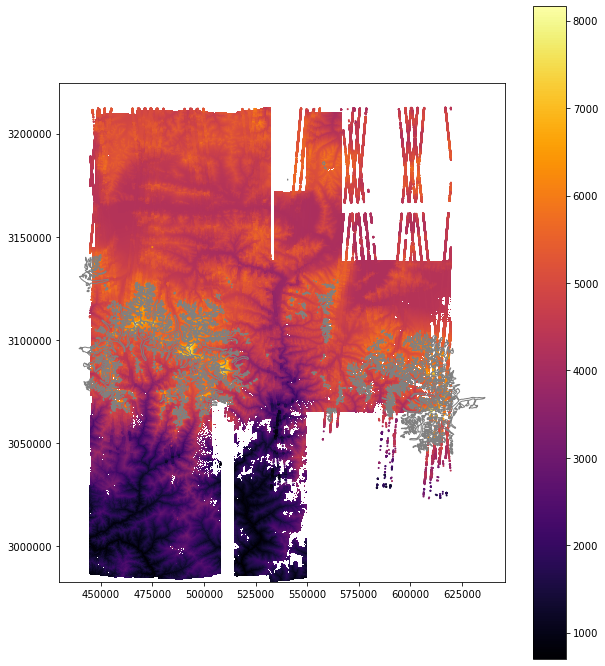

In [36]:
fig,ax = plt.subplots(figsize=(10,12))
#xmin,ymin,xmax,ymax = nepal_ds.bounds
im = ax.imshow(nepal_dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)
rgi_gdf.plot(ax=ax,edgecolor='gray',facecolor='None')


In [ ]:
#sampled_gdf = gda_lib.buffer_sampler(nepal_ds,big_gdf,14,ret_gdf=True)

In [37]:

#Just use these columns from RGI
rgi_col = ['Area','Name','geometry']

In [38]:
glac_icesat2 = gpd.sjoin(big_gdf,rgi_gdf[rgi_col],op='intersects',how='inner')

In [40]:
glac_icesat2 = gda_lib.buffer_sampler(nepal_ds,glac_icesat2,14,ret_gdf=True)

In [41]:
#filter icesat2 polygons based on cloud
glac_icesat2.head()

,Area,Name,atl06_quality_summary,beam,delta_time,geometry,h_li,index_right,latitude,longitude,med,p_b,pair
0,2.757,None,0,0.0,2.543521e+07,"POLYGON ((481567.1278506737 3070113.667736726,...",5688.831543,3740,27.755331,86.812805,5689.084473,1.0_0.0,1.0
1,2.757,None,0,0.0,2.543521e+07,"POLYGON ((481565.247008206 3070133.624178662, ...",5683.313965,3740,27.755511,86.812786,5684.102051,1.0_0.0,1.0
2,2.757,None,0,0.0,2.543521e+07,"POLYGON ((481563.3619592602 3070153.581129991,...",5678.470215,3740,27.755691,86.812767,5679.666016,1.0_0.0,1.0
3,2.757,None,0,0.0,2.543521e+07,"POLYGON ((481561.4700794285 3070173.538327715,...",5674.227051,3740,27.755872,86.812747,5673.425537,1.0_0.0,1.0
4,2.757,None,0,1.0,2.543521e+07,"POLYGON ((481638.3729867208 3070201.070819436,...",5659.330078,3740,27.756121,86.813527,5660.101562,1.0_1.0,1.0


In [42]:
len(glac_icesat2)

21052

In [43]:
glac_icesat2['dh'] = glac_icesat2['med']-glac_icesat2['h_li']

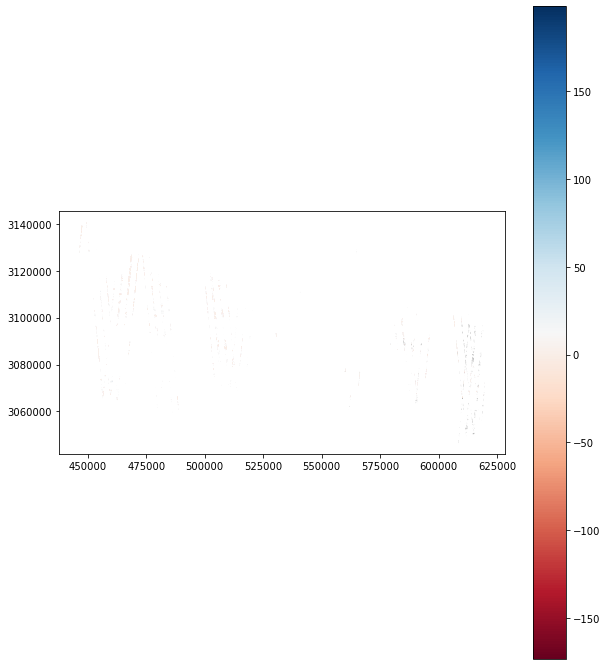

In [52]:
fig,ax = plt.subplots(figsize=(10,12))
glac_icesat2.plot('dh',cmap='RdBu',legend=True,ax=ax,markersize=10)
#ax.set_xlim((xmin,xmax))
#ax.set_ylim((ymin,ymax))